# Quick demo of segmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import stumpy as sp
import os
import sys
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, '../tsmule')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation
from tsmule.xai.viz import visualize_segmentation_mask


In [3]:

url = "https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1"
df = pd.read_csv(url)

n = 256
ts = df["steam flow"][:n]
ts2 = df["drum pressure"][:n]
mts = np.stack([ts, ts2], axis=1)

## Segmentation with bins of matrix profile distance

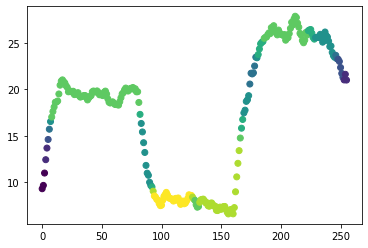

In [4]:
mseg = MatrixProfileSegmentation(partitions=10, win_length=32)
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="bins-max")
plt.scatter(range(n), ts, c=seg_m)

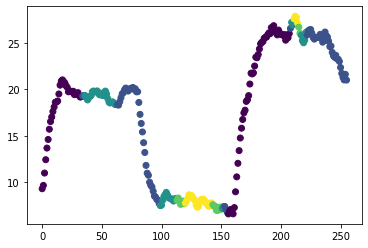

In [5]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="bins-min")
plt.scatter(range(n), ts, c=seg_m)

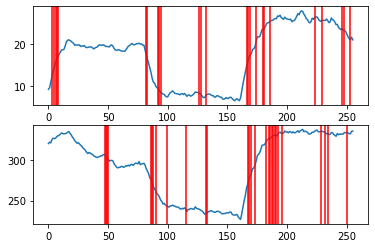

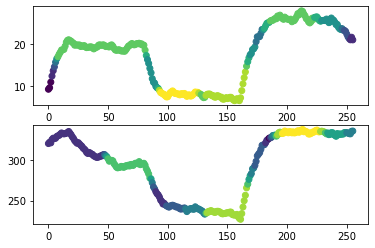

In [6]:
seg_m = mseg.segment(mts, segmentation_method="bins-max")

visualize_segmentation_mask(mts, seg_m)

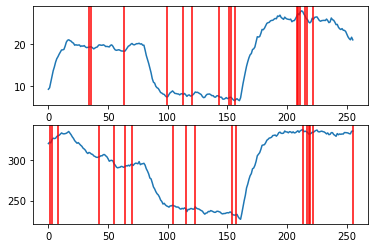

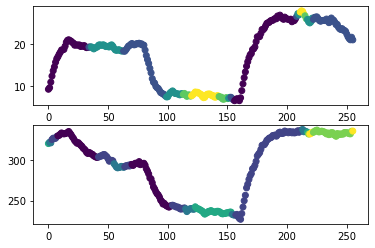

In [7]:
seg_m = mseg.segment(mts, segmentation_method="bins-min")

visualize_segmentation_mask(mts, seg_m)

## Segmentation with slopes of matrix profile distance

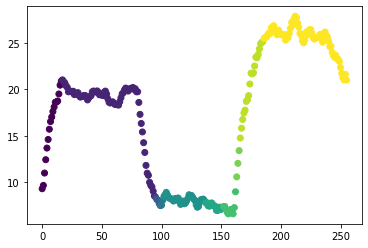

In [8]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="slopes-min")
plt.scatter(range(n), ts, c=seg_m)

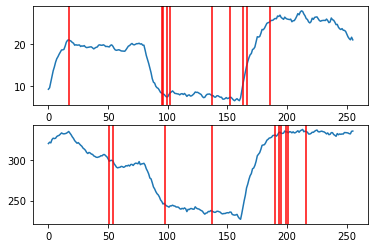

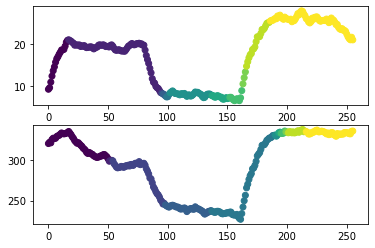

In [9]:
seg_m = mseg.segment(mts, segmentation_method="slopes-min")

visualize_segmentation_mask(mts, seg_m)

## Segmentation with SAX

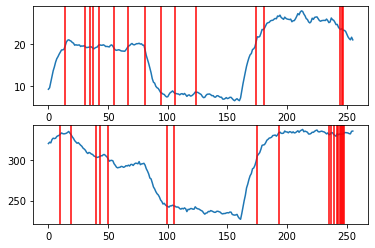

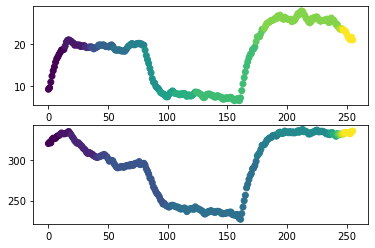

In [10]:
sseg = SAXSegmentation(partitions=10)
seg_m = sseg.segment(mts)

visualize_segmentation_mask(mts, seg_m)